# <span style="color:darkred">  Esercitazione 1 </span>


### Esercizio 1.1

#### Richiesta 1. 
Stimare l'integrale $\langle r \rangle = \int_0^1 r dr = 1/2$ utilizzando l'analisi degli errori tramite il metodo a blocchi.

_____________________
##### Svolgimento
Per stimare l'integrale ho estratto un valore pseudo-casuale tra $[0,1)$ per un totale di 100000 volte. I lanci sono stati suddivisi in 100 blocchi euguali, coi quali ho eseguito l'analisi dell'errore come di inseguito mostrato. 

In [16]:
import math
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


from scipy import stats

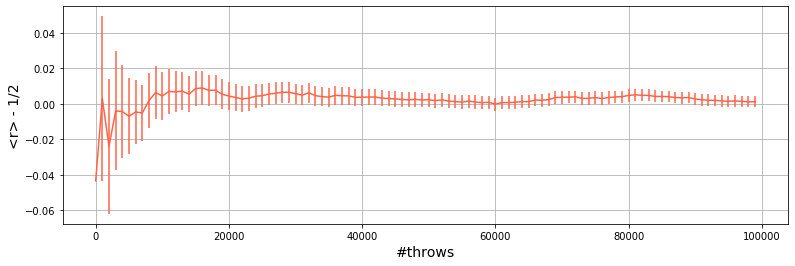

In [24]:
M = 100000  #numero di lanci
N = 100     #numero di blocchi
L = int(M/N)
x = np.arange(N)
r, error  = np.loadtxt("Es01/misure.dat", usecols=(0,1), delimiter=' ', unpack='true')

x*=L #rinomalizzo il n di blocchi sul n di lanci
plt.figure(1, figsize=(13,4))
plt.errorbar(x,r- 0.5,yerr=error, color='tomato') 
plt.xlabel('#throws', fontsize= 14)
plt.ylabel('<r> - 1/2', fontsize= 14)
plt.grid(True)
plt.show()


Dal grafico si osserva che il valore di $\langle r \rangle$ tende a 1/2 all'aumentare del numero di blocchi, con una precisione sempre maggiore. Al raggiungimento del centesimo blocco (100000 lanci totali) $\langle r \rangle = 0.501214 \pm 0.00306686$.

#### 2. 
Stimare ora il valore di $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$.

____________________
##### Svolgimento

Per la stima di $\sigma^2$ ho utilizzato gli stessi steps e gli stessi blocchi dell'esercizio precedente.

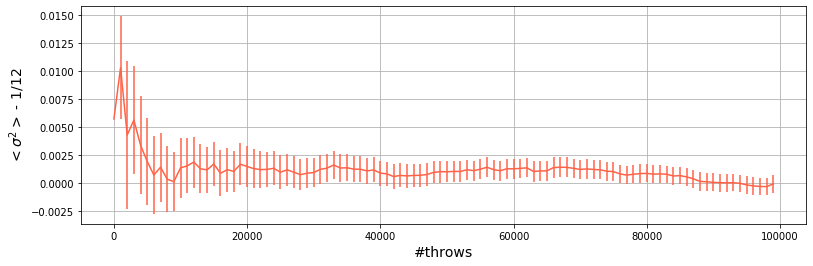

In [18]:
s , serror = np.loadtxt("Es01/misure.dat", usecols=(2,3), delimiter=' ', unpack='true')

plt.figure(1, figsize=(13,4))
plt.errorbar(x, s - 1/12,yerr=serror, color='tomato')
plt.xlabel('#throws', fontsize= 14)
plt.ylabel('$<\sigma^2>$ - 1/12', fontsize= 14)
plt.grid(True)
plt.show()

Dal grafico si osserva che il valore di $\langle \sigma^2 \rangle$ tende a 1/12 all'aumentare del numero di blocchi, con una precisione sempre maggiore. Al raggiungimento del centesimo blocco  $\langle \sigma^2 \rangle = 0.0832638 \pm 0.000788592$..

### Test del Chi2
The hypothesis is that the numbers $r$ are drawn from a uniform distribution. In Statistics we cannot prove that some random events are drawn from a particular distribution (Note, in fact, that such hypothesis is false: pseudo-random numbers are drawn from a deterministic algorithm!); we can try to estimate the probability that $r$ **are not** drawn from a uniform distribution. If this probability is low, we can safely reject this last hypothesis.

Divide $[0,1]$ into $M$ identical sub-intervals and implement the $\chi^2$ test. Obviously, the number of expected events observed in each sub-interval after $n$ *throws*, according to a uniform distribution, is $np = n\times 1/M= n/M$. Fix $M=10^2$ and use for $n$ the first $10^4$ pseudo-random numbers, then the successive $10^4$ pseudo-random numbers, and so on ... 100 times. Plot $\chi^2_j$ for $j=1, ..., 100$. In this case the chi-square statistic is:
$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$

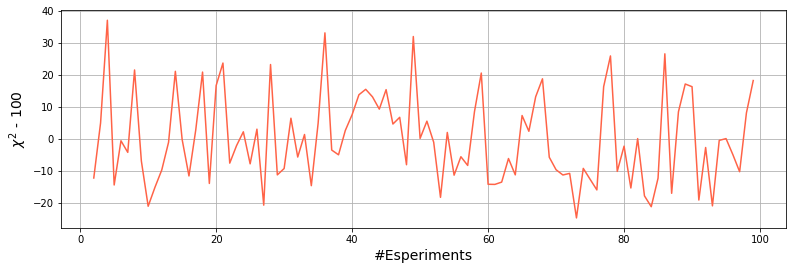

In [19]:
M = 100
N = 10000
x = np.arange(100)

plt.figure(1, figsize=(13,4))
y = np.loadtxt("Es01/chi2.dat", usecols=(0), unpack='true')
plt.plot(x, y-N/M, color='tomato')
plt.xlabel('#Esperiments', fontsize= 14)
plt.ylabel('$\chi^2$ - 100', fontsize= 14)
plt.grid(True)
plt.show()

Dall'analisi del $\chi^2$ si osserva un oscillazione del valore intorno a $\chi^2 = n/M = 100$. Questo conferma l'ipotesi che $r$ sia estratto da una distribuzione uniforme. Le oscillazioni intorno a questo valore sono dovute al fatto che $r$ è, in verità, estratto da un algoritmo pseudo-random. 

### Esercizio 1.2 - Check Central Limit Theorem

#### Richiesta

* Add two probability distributions by using the method of the inversion of the cumulative distribution to sample from a generic exponential distribution, $p(x) = \lambda \exp(-\lambda x)$, $x\in [0;+\infty]$, and a generic Cauchy-Lorentz distribution $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$, $x\in [-\infty;+\infty]$.
* Make 3 pictures with the histograms obtained filling them with $10^4$ realizations of $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ (for $N=1, 2, 10, 100$), being $x_i$ a random variable sampled throwing a *standard* dice (fig.1), an *exponential* dice (fig.2, use $\lambda=1$) and a *Lorentzian* dice (fig.3, use $\mu=0$ and $\Gamma=1$).

Note tha you can try to fit the case $N=100$ with a Gaussian for standard and exponential dices, whereas you should use a Cauchy-Lorentz distribution for the last case.

________________________________________
##### Svolgimento 

Per il seguente esercizio sono andato a calcolare la $S_N$ per un totale di 10.000 volte. Di seguito vengono mostrati l'andamento degli istogrammi per le tre distribuzioni richieste.

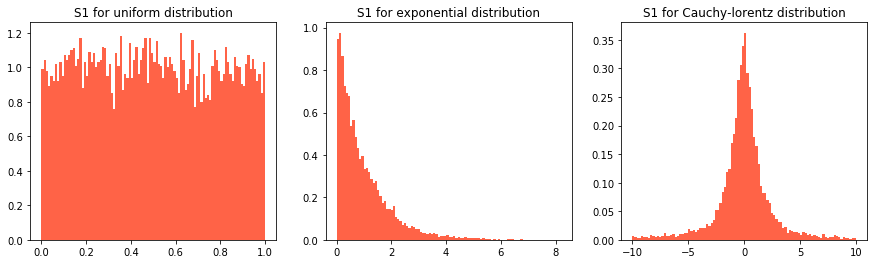

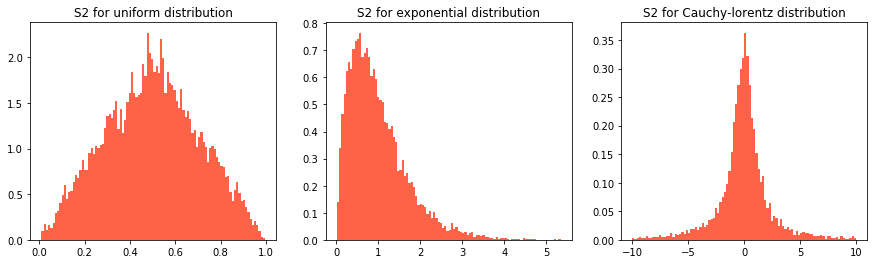

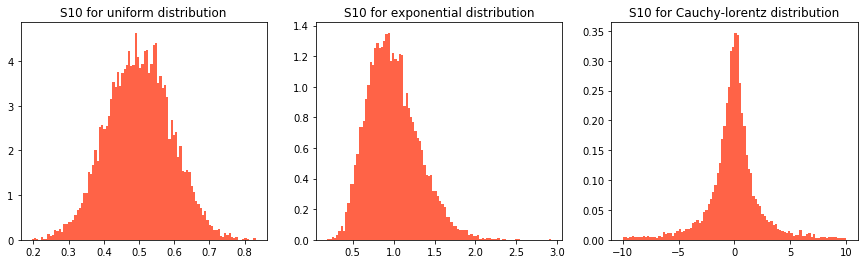

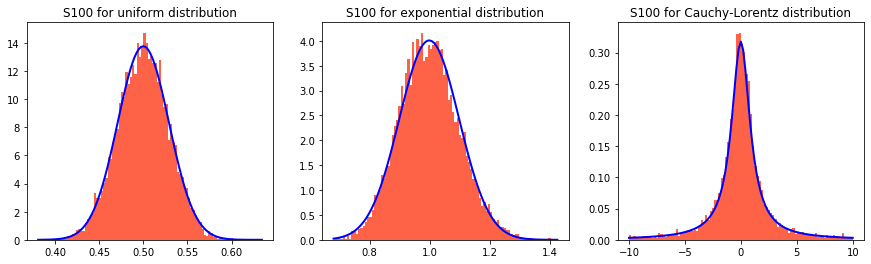

In [20]:
T = 10000 #misure
n_bins = 100 
x = np.zeros(T)
y = np.zeros(T)
z = np.zeros(T)

x, y, z= np.loadtxt("Es02/N1.dat", usecols=(0,1,2), delimiter=' ', unpack='true')

#Media sul singolo elemento
fig, canvas = plt.subplots(1, 3, figsize=(15,4))
canvas[0].hist(x,n_bins, density = True, facecolor='tomato')
canvas[1].hist(y,n_bins, density =True, facecolor='tomato')
canvas[2].hist(z,n_bins, density = True, range=(-10,10), facecolor='tomato')

canvas[0].set_title('S1 for uniform distribution')
canvas[1].set_title('S1 for exponential distribution')
canvas[2].set_title('S1 for Cauchy-lorentz distribution')

#Media su due elementi
x, y, z= np.loadtxt("Es02/N2.dat", usecols=(0,1,2), delimiter=' ', unpack='true')

fig, canvas = plt.subplots(1, 3, figsize=(15,4))
canvas[0].hist(x,n_bins, density = True, facecolor='tomato')
canvas[1].hist(y,n_bins, density =True, facecolor='tomato')
canvas[2].hist(z,n_bins, density = True, range=(-10,10), facecolor='tomato')

canvas[0].set_title('S2 for uniform distribution')
canvas[1].set_title('S2 for exponential distribution')
canvas[2].set_title('S2 for Cauchy-lorentz distribution')

#Media su 10 lementi
x, y, z= np.loadtxt("Es02/N10.dat", usecols=(0,1,2), delimiter=' ', unpack='true')

fig, canvas = plt.subplots(1, 3, figsize=(15,4))
canvas[0].hist(x,n_bins, density = True, facecolor='tomato')
canvas[1].hist(y,n_bins, density =True, facecolor='tomato')
canvas[2].hist(z,n_bins, density = True, range=(-10,10), facecolor='tomato')

canvas[0].set_title('S10 for uniform distribution')
canvas[1].set_title('S10 for exponential distribution')
canvas[2].set_title('S10 for Cauchy-lorentz distribution')


#Media su 100lementi
x, y, z= np.loadtxt("Es02/N100.dat", usecols=(0,1,2), delimiter=' ', unpack='true')

fig, canvas = plt.subplots(1, 3, figsize=(15,4)) 

# best fit of data
(mu_x, sigma_x) = stats.norm.fit(x)
(mu_y, sigma_y) = stats.norm.fit(y)
(mu_z, gamma_z) = stats.cauchy.fit(z)
# the histogram of the data
n_x, bins_x, patches_x = canvas[0].hist(x, n_bins, density = True, facecolor='tomato')
n_y, bins_y, patches_y = canvas[1].hist(y, n_bins, density = True, facecolor='tomato')
n_z, bins_z, patches_z = canvas[2].hist(z, n_bins, density = True,range=(-10,10), facecolor='tomato')
    
# add a 'best fit' line
y_x = stats.norm.pdf( bins_x, mu_x, sigma_x)
canvas[0].plot(bins_x, y_x, 'b', linewidth=2)
y_y = stats.norm.pdf( bins_y, mu_y, sigma_y)
canvas[1].plot(bins_y, y_y, 'b', linewidth=2)
y_z = stats.cauchy.pdf( bins_z, mu_z, gamma_z)
canvas[2].plot(bins_z, y_z, 'b', linewidth=2)

canvas[0].set_title('S100 for uniform distribution')
canvas[1].set_title('S100 for exponential distribution')
canvas[2].set_title('S100 for Cauchy-Lorentz distribution')

plt.show()

In [21]:
print(" == FIT PARAMETERS ==")
print("Uniform distribution  ")
print("mu: ",mu_x, ", sigma: ",sigma_x)
print("Exponential distribution") 
print("mu: ",mu_y, ", sigma: ",sigma_y)
print("Cauchy-Lorentz distribution") 
print("mu: ",mu_z, ", Gamma: ",gamma_z)


 == FIT PARAMETERS ==
Uniform distribution  
mu:  0.5000059557000001 , sigma:  0.028981971839868618
Exponential distribution
mu:  0.9985749023 , sigma:  0.09948935686014537
Cauchy-Lorentz distribution
mu:  -0.005323830880598951 , Gamma:  1.0030971371542923


Dall'ultima riga dei grafici si osserva che al raggiungimento della media su 100 elementi è verificato il Teorema del Limite Centrale. I valori delle medie, calcolate sommando 100 elementi aleatori indipendenti, risultano distribuiti secondo la distribuzione gaussiana. Nel nostro caso le distribuzioni sono sempre pseudo-casuali (essendo estratte da un algoritmo computazionale), il fatto che il Teorema del Limite Centrale venga rispettato sigifica quindi che non c'è una forte correlazione fra le varibili. 

Per gli elementi estratti dalla distribuzione uniforme, la media è distribuita secondo una guassiana con paramentri $\mu = 0.5000059557000001$ e $\sigma = 0.028981971839868618$.
Mentre per la distribuzione esponenziale, la gaussiana è definita da $\mu = 0.9985749023$ e $\sigma = 0.09948935686014537$.

Se si considera il grafico degli elementi distribuiti dalla distribuzione di Cauchy-Lorentz, (che presenta il secondo momento infinito), si osserva che le somme non tendono ad una distribuzione gaussiana (che richiede secondo momento finito), ma rimangono distribuite secondo la distribuzione di partenza. Questo conferma che la distribuzione di Cauchy-Lorentz è una distribuzione stabile. Esisteranno delle distribuzioni $p(x)$, la cui somma di N elementi tenderà, pen N grandi, alla distribuzione di Cauchy-Lorentz. 

In questo caso la distribuzione di Cauchy-Lorentz è definita da $\mu = -0.005323830880598951$ e $\Gamma =1.0030971371542923$, che sono circa uguali ai parametri iniziali della distribuzione.

### Esercizio 1.3 - Buffon’s experiment
A needle of length $L$ is thrown at random onto a horizontal plane ruled with straight lines a distance $d$ (must be $d > L$, but do not use $d\gg L$ otherwise $P\ll 1$) apart. The probability $P$ that the needle will intersect one of these lines is: $P = 2L/\pi d$. This could be used to evaluate $\pi$ from throws of the needle: if the needle is thrown down $N_{thr}$ times and is observed to land on a line $N_{hit}$ of those times, we can make an estimate of $\pi$ from
$$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$
Make a picture of the estimation of $\pi$ and its uncertainty (Standard Deviation of the mean) with a large number of *throws* $M$ as a function of the number of blocks, $N$. If possible, do not use $\pi$ to evaluate $\pi$.

##### Svolgimento

La simulazione dell'esperimento è stata eseguita con i seguenti parametri sperimentali:
 *  Distanza fra le linee $d$ = 0.1 (lavoro in un foglio 1x1, righe verticali)
 *  Lunghezza ago $L$ = 0.07
 *  Lanci totali $T$ = 3000000
 
Di seguito è riportata l'analisi delle misure trovate. L'analisi è svolta con il metodo a blocchi, su un totale di 100 blocchi.

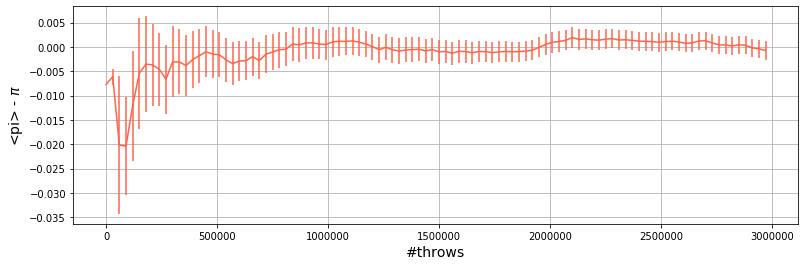

In [22]:
T= 3000000 #lanci totali
M = 100   #numero di blocchi
N = int(T/M)    #numero di lanci in ogni blocco
x = np.arange(M)
r, error  = np.loadtxt("Es03/misurePI.dat", usecols=(0,1), delimiter=' ', unpack='true')

x*=N #rinomalizzo il n di blocchi sul n di esperimenti
plt.figure(1, figsize=(13,4))
plt.errorbar(x,r - math.pi, yerr=error, color='tomato') 
plt.xlabel('#throws', fontsize= 14)
plt.ylabel('<pi> - $\pi$', fontsize= 14)
plt.grid(True)
plt.show()

Dal grafico si osserva che dopo 1000000 lanci il valore di $<\pi>$ inizia ad oscillare in un intorno di $\pi_{real} \pm 0.005$, aumentando la precisione ad ogni nuovo esperimento (3000 lanci). 
Al 3000000 lancio si raggiunge un valore di $<\pi>  = 3.14089 \pm 0.00188994$.